In [1]:
# Geopandas，其他GIS工具Pyecharts
# 依赖包需要依次安装，最后安装Geopandas：
# GDAL、Fina、pyproj、Rtree、shapely、
# GDAL的安装：①brew install GDAL安装GDAL;②brew info GDAL查看GDAL版本；③pip install GDAL==3.5.2（与brew安装的版本一致）
# 安装完的GDAL无法直接import gdal，但是from osgeo import gdal却可以
# 因此，写以下脚本放置与site-packages文件夹中
# from osgeo.gdal import deprecation_warn
# deprecation_warn('gdal')
# from osgeo.gdal import *
# pycharm无法使用gdal和geopandas，因此使用jupyter notebook进行绘图。

In [1]:
import geopandas as gpd

print('OK!')

OK!


In [2]:
import shapely.geometry as geo
pnt = geo.Point(0,0)
print('This distance between point(0.0) and (1,1) is:', pnt.distance(geo.Point(1,1)))
gpd.GeoSeries([geo.Point(0,0),
               geo.Point(0,1),
               geo.Point(1,1),
               geo.Point(1,0)],
             index=['a','b','c','d'])

This distance between point(0.0) and (1,1) is: 1.4142135623730951


a    POINT (0.00000 0.00000)
b    POINT (0.00000 1.00000)
c    POINT (1.00000 1.00000)
d    POINT (1.00000 0.00000)
dtype: geometry

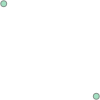

In [12]:
multi_pnt = gpd.GeoSeries([geo.MultiPoint([(0,1),(1,0)]),
                           geo.MultiPoint([(0,0),(1,1)])],
                           index=['a','b'])
multi_pnt[0]

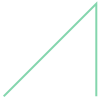

In [15]:
line = gpd.GeoSeries([geo.LineString([(0,0),(1,1),(1,0)]),
                     geo.LineString([(0,0),(0,1),(-1,0)])],
                    index=['a','b'])
line[0]

Area is: 0.0
Length is: 3.0
Bounds is: (0.0, 0.0, 1.0, 1.0)
Coords is: (0.0, 0.0) (0.0, 1.0) (1.0, 1.0) (1.0, 0.0)


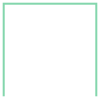

In [23]:
line = geo.LineString([(0,0),(0,1),(1,1),(1,0)])
print('Area is:', line.area)
print('Length is:', line.length)
print('Bounds is:', line.bounds) # 顶点坐标
print('Coords is:', *line.coords) # *将列表解开成几个独立的参数，传入函数
line

Area is: 0.0
Length is: 4.0
Bounds is: (0.0, 0.0, 1.0, 1.0)
Coords is: (0.0, 0.0) (0.0, 1.0) (1.0, 1.0) (1.0, 0.0) (0.0, 0.0)


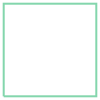

In [24]:
ring = geo.LinearRing([(0,0),(0,1),(1,1),(1,0)])
print('Area is:', ring.area)
print('Length is:', ring.length)
print('Bounds is:', ring.bounds)
print('Coords is:', *ring.coords)
ring

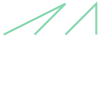

In [26]:
geo.MultiLineString([[(0,0),(1,1),(1,0)],[(-2,0),(0,1),(-1,0)]])

Area is: 5.0
Length is: 8.82842712474619
Bounds is: (0.0, 0.0, 3.0, 2.0)
Coords is: (0.0, 0.0) (0.0, 2.0) (2.0, 2.0) (3.0, 1.0) (2.0, 0.0) (0.0, 0.0)


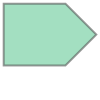

In [29]:
polygon = geo.Polygon([(0,0),(0,2),(2,2),(3,1),(2,0)])
print('Area is:', polygon.area)
print('Length is:', polygon.length)
print('Bounds is:', polygon.bounds)
print('Coords is:', *polygon.exterior.coords) # Polygon可以分为有孔与无孔，所以其边界coords需要指明为 exterior。
polygon

Area is: 83.5
Length is: 69.8309518948453
Bounds is: (0.0, 0.0, 10.0, 10.0)
Coords is: (0.0, 0.0) (10.0, 0.0) (10.0, 10.0) (0.0, 10.0) (0.0, 0.0)


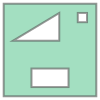

In [30]:
polygon1 = geo.Polygon([(0,0),(10,0),(10,10),(0,10)],
                      [
                          ((3,3),(7,3),(7,1),(3,1)),
                          ((9,9),(9,8),(8,8),(8,9)),
                          ((1,6),(6,6),(6,9))
                      ])
print('Area is:', polygon1.area)
print('Length is:', polygon1.length)
print('Bounds is:', polygon1.bounds)
print('Coords is:', *polygon1.exterior.coords)
polygon1

Area is: 1.5
Length is: 7.414213562373095
Bounds is: (0.0, 0.0, 3.0, 3.0)


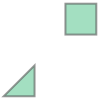

In [32]:
multi_polygon = geo.MultiPolygon([geo.Polygon([(0,0),(1,1),(1,0)]),
                                 geo.Polygon([(2,2),(2,3),(3,3),(3,2),(2,2)])])
print('Area is:', multi_polygon.area)
print('Length is:', multi_polygon.length)
print('Bounds is:', multi_polygon.bounds)
multi_polygon

In [35]:
# 按顺序连线时穿过了之前定义的边，定义为不合法
s_ = gpd.GeoSeries([geo.Polygon([(4,0),(6,1),(4,1),(6,0)]),
                   geo.MultiPolygon([geo.Polygon([(4,0),(5,0.5),(6,0)]),
                                    geo.Polygon([(5,0.5),(6,1),(4,1)])])])
s_.is_valid #s_valid”属性输出每个几何体是否满足合法性检查

0    False
1     True
dtype: bool

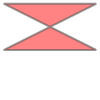

In [36]:
s_[0] # 第一个几何体因为有交叉部分所以不合法

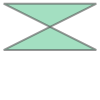

In [37]:
s_[1] # 第二个几何体为两个Polygon拼接所成，满足合法性检查